In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iriscsv/Iris.csv


In [72]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')

In [74]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [76]:
df.drop('Id', axis=1, inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [78]:
agg_funcs = {
    'SepalLengthCm': ['min', 'max', 'mean', 'std'],
    'SepalWidthCm': ['min', 'max', 'mean', 'std'],
    'PetalLengthCm': ['min', 'max', 'mean', 'std'],
    'PetalWidthCm': ['min', 'max', 'mean', 'std']
}


grouped_data = df.groupby('Species').agg(agg_funcs)

# Rename the columns for clarity
grouped_data.columns = ['Min_SepalLengthCm', 'Max_SepalLengthCm',
                        'Mean_SepalLengthCm', 'Std_SepalLengthCm',
                        'Min_SepalWidthCm', 'Max_SepalWidthCm',
                        'Mean_SepalWidthCm', 'Std_SepalWidthCm',
                        'Min_PetalLengthCm', 'Max_PetalLengthCm',
                        'Mean_PetalLengthCm', 'Std_PetalLengthCm',
                        'Min_PetalWidthCm', 'Max_PetalWidthCm',
                        'Mean_PetalWidthCm', 'Std_PetalWidthCm']


grouped_data.reset_index(inplace=True)


print(grouped_data)

           Species  Min_SepalLengthCm  Max_SepalLengthCm  Mean_SepalLengthCm  \
0      Iris-setosa                4.3                5.8               5.006   
1  Iris-versicolor                4.9                7.0               5.936   
2   Iris-virginica                4.9                7.9               6.588   

   Std_SepalLengthCm  Min_SepalWidthCm  Max_SepalWidthCm  Mean_SepalWidthCm  \
0           0.352490               2.3               4.4              3.418   
1           0.516171               2.0               3.4              2.770   
2           0.635880               2.2               3.8              2.974   

   Std_SepalWidthCm  Min_PetalLengthCm  Max_PetalLengthCm  Mean_PetalLengthCm  \
0          0.381024                1.0                1.9               1.464   
1          0.313798                3.0                5.1               4.260   
2          0.322497                4.5                6.9               5.552   

   Std_PetalLengthCm  Min_PetalWidthC

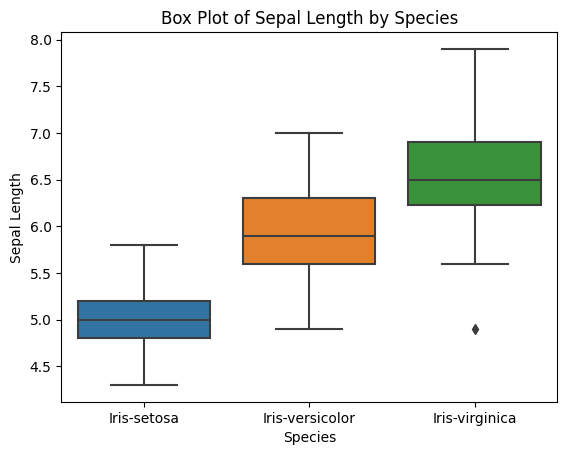

In [79]:
sns.boxplot(data=df, x="Species", y="SepalLengthCm")

# Add title and labels
plt.title("Box Plot of Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length")

# Show plot
plt.show()


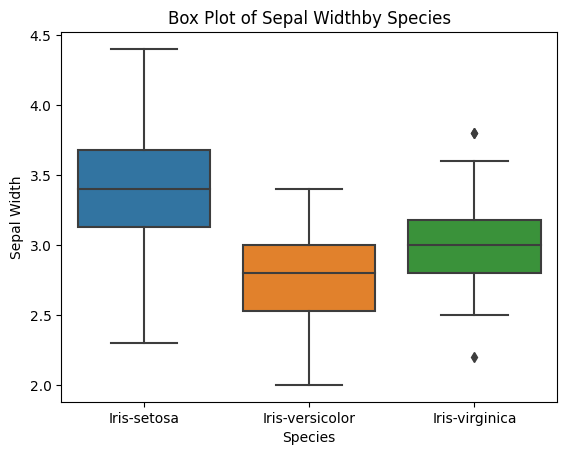

In [80]:
sns.boxplot(data=df, x="Species", y="SepalWidthCm")

# Add title and labels
plt.title("Box Plot of Sepal Widthby Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width")

# Show plot
plt.show()

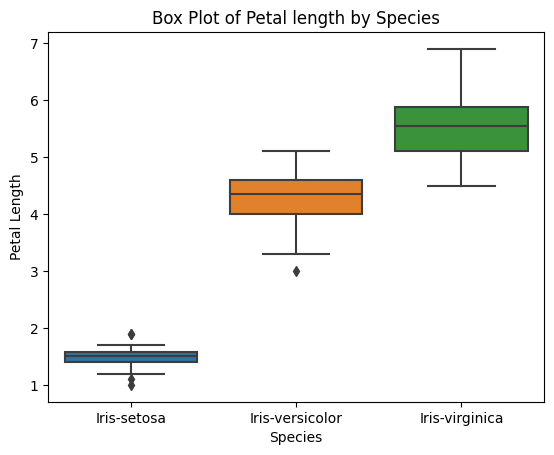

In [81]:
sns.boxplot(data=df, x="Species", y="PetalLengthCm")

plt.title("Box Plot of Petal length by Species")
plt.xlabel("Species")
plt.ylabel("Petal Length")


plt.show()

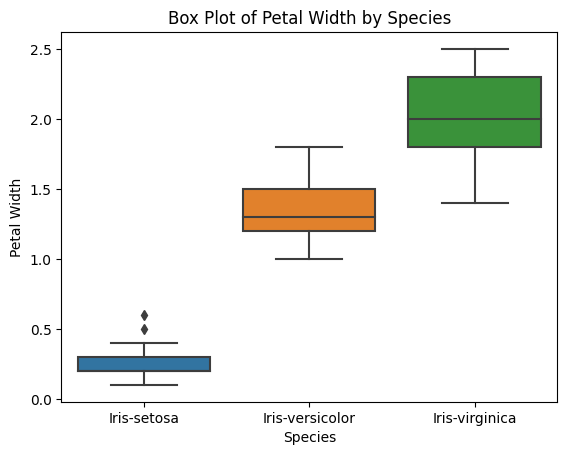

In [82]:
sns.boxplot(data=df, x="Species", y="PetalWidthCm")

plt.title("Box Plot of Petal Width by Species")
plt.xlabel("Species")
plt.ylabel("Petal Width")


plt.show()

It was found that Iris Setosa is easier to identify because it has more smaller Petal ans Sepal ' lenght and width

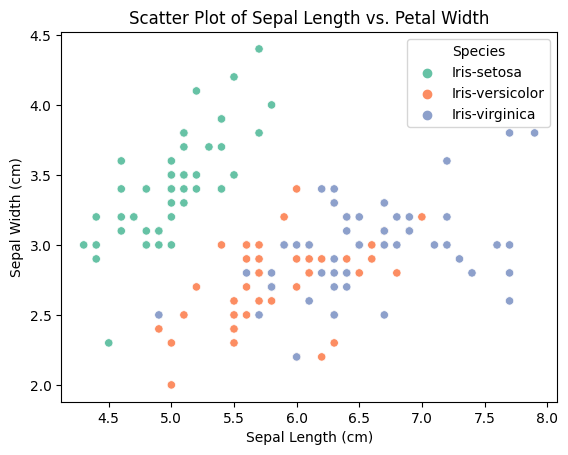

In [83]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df, palette='Set2')


# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot of Sepal Length vs. Petal Width')

# Show the plot
plt.show()

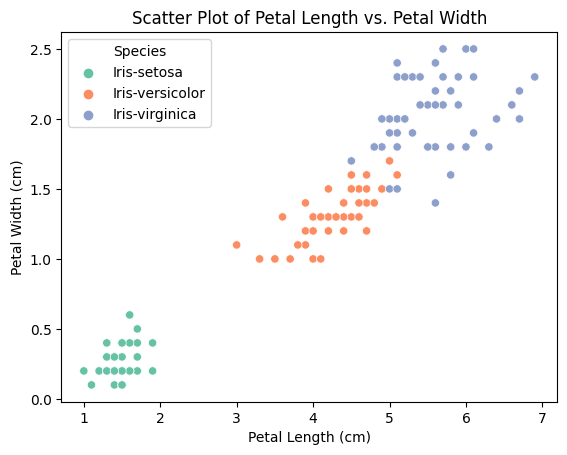

In [84]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df, palette='Set2')


# Add labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Petal Length vs. Petal Width')

# Show the plot
plt.show()

In [85]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['Species']

# Subset the data with the selected columns
data_subset = df[columns_to_encode]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform the data after reshaping to a 2D array
encoded_data = encoder.fit_transform(data_subset.values.reshape(-1, 1))

# Get the feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(input_features=columns_to_encode)

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Concatenate the encoded data with the original data
df_encoded = pd.concat([df, encoded_df], axis=1)



/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [86]:
df_encoded.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df_encoded.drop('Species', axis=1)
y = df_encoded['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 1.0


In [88]:
from sklearn.metrics import accuracy_score, precision_score
precision = precision_score(y_test, y_pred, average='weighted')

print("Precision:", precision)

Precision: 1.0
